## Importing Needed Libraries and data base


In [1]:
import pandas as pd
import numpy as np
import random
import io
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#df_from_file = pd.read_csv('/Users/alejandrocampos/Documents/Iron_Hack_Labs/pandas-project/your-code/attacks.csv', encoding = "cp1252")
df_from_file = pd.read_csv('attacks.csv', encoding = "cp1252")



In [3]:
df_from_file.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
df_from_file.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
df_from_file.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
df_from_file[['Sex ']]

,Sex
0,F
1,F
2,M
3,M
4,M
...,...
25718,NaN
25719,NaN
25720,NaN
25721,NaN


In [7]:
#Para centrarme en Sex y age hago un slicing. Pero no me sale
df_from_file[["Sex ", "Age"]] 





,Sex,Age
0,F,57
1,F,11
2,M,48
3,M,NaN
4,M,NaN
...,...,...
25718,NaN,NaN
25719,NaN,NaN
25720,NaN,NaN
25721,NaN,NaN


In [8]:
#aquí traro de ver aquellas filas que no están rellenas, pero tampoco me sale

df_from_file[df_from_file.Age== "NaN"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [9]:
df_from_file.Age.describe()

count     3471
unique     157
top         17
freq       154
Name: Age, dtype: object

In [10]:
df_from_file.Age.unique()


array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [11]:
#Aquí me dot cuenta de que a parte de haber filas sin rellenar hay otras que no son un número solamente. 


df_from_file.Age.value_counts()



17                         154
18                         150
19                         142
20                         141
15                         139
                          ... 
25 or 28                     1
Ca. 33                       1
9 months                     1
23 & 26                      1
37, 67, 35, 27,  ? & 27      1
Name: Age, Length: 157, dtype: int64

In [12]:
#df_from_file.Age = df_from_file.Age.apply(lambda x : x.capitalize())

#looking at relative percentage between null vs not-null series into age

isnull_age= df_from_file.Age.isnull().sum()
notnull_age = df_from_file.Age.notnull().sum()
total = isnull_age +  notnull_age

relative_null = isnull_age / total * 100
relative_null

#Mostly, Age series is null.

86.50623955215178

In [13]:
##df_from_file['fill_mean'] = df_from_file['Age'].fillna(df_from_file['Age'].mean())    


In [14]:
df_from_file.Age.value_counts()


17                         154
18                         150
19                         142
20                         141
15                         139
                          ... 
25 or 28                     1
Ca. 33                       1
9 months                     1
23 & 26                      1
37, 67, 35, 27,  ? & 27      1
Name: Age, Length: 157, dtype: int64

In [15]:
df_from_file.Country.value_counts()


USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
                    ... 
SOUTH CHINA SEA        1
ITALY / CROATIA        1
ANGOLA                 1
GRAND CAYMAN           1
KUWAIT                 1
Name: Country, Length: 212, dtype: int64

In [16]:
#There are some keywords into "Age" series such us "Teen" , "mid-30s" etc. 
#teenwise: "denoting a person between 13 and 19 years old." 
#adultwise mostly are USA citiens. I find on the internet average adult age in USA to replace over labels named "adult", "middel-age" et
# According to https://www.statista.com/statistics/241494/median-age-of-the-us-population/ is 38 however in other countries 
#such us australia or latin america is a bit less. Also are population is based on surfers so lets say 35
teen = np.array([[13], [19]])
teen = np.mean(teen)
teen_mean_age = int(teen)
print(teen_mean_age)

early_20s = 20
mid_20s = 25
late_20s = 28
early_teen = 12
kid = 10
elderly = 60
agult_mean_age = 35

df_from_file.Age.replace(to_replace =["9 months", "12 or 13", "7      &    31", "8 or 10" , "6½", "1", "13 or 18", '2½', '13 or 14', "2 to 3 months", "9 or 10", "Both 11", "7 or 8", "?    &   14", "2 to 3 months", "9 & 12", "X", "10 or 12", "18 months", "Teen", "teen","17 & 16", "Teens", "? & 19", '"young"', "young", "16 to 18"], 
                         value = teen_mean_age, inplace = True)

df_from_file.Age.replace(to_replace =["18 or 20", "21 & ?", "23 & 20", "18 to 22"], 
                         value = early_20s, inplace = True) 

df_from_file.Age.replace(to_replace =["20s", "21 or 26", "20?", "17 & 35", "28, 23 & 30", "mid-20s", "23 & 26"], 
                         value = mid_20s, inplace = True)    


df_from_file.Age.replace(to_replace =["28 & 26", "36 & 26", "33 & 26", "25 or 28", "21, 34,24 & 35", "25 to 35", "34 & 19"], 
                         value = late_20s, inplace = True)  

df_from_file.Age.replace(to_replace =[" ", "  ", "A.M.", "'  '", "32 & 30", "Ca. 33", "30 & 32", "F", ">50", '"middle-age"',"30s", "mid-30s", '31 or 33', "\xa0 ", "adult", "33 & 37", "33 or 37", "? & 19", '30 or 36', "46 & 34","33 or 37", "(adult)", "37, 67, 35, 27,  ? & 27", "50 & 30","MAKE LINE GREEN", "36 & 23"], 
                         value = agult_mean_age, inplace = True)




df_from_file.Age.replace(to_replace =["40s"], 
                         value = "45", inplace = True)

df_from_file.Age.replace(to_replace =["50s"], 
                         value = "55", inplace = True)


df_from_file.Age.replace(to_replace =["Elderly", "60's", "60s"], 
                         value = elderly, inplace = True)


df_from_file.Age.unique()

#Igual así la prox vez...
#df["Age"] = df["Age"].str.replace(r'', '')

#pd.Series.str.replace(old, new) 

#df_from_file.Age.replace()


16


array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '40', '13', '42', '3', '8', '50',
       '16', '82', '73', 25, '68', '51', '39', '58', 16, '47', '61', '65',
       '36', '66', '43', 60, '9', '72', '59', '6', '27', '64', '23', '71',
       '44', '62', '63', '70', '53', 35, '77', '74', 28, '5', '86', 20,
       '84', '75', ' 30', ' 28', '87', '67', '74 ', '45 ', '20 ', ' 43',
       '81', '78'], dtype=object)

In [17]:
#removing white spaces

df_from_file.Age = df_from_file.Age.str.strip()


In [18]:
df_from_file.Age.unique()


array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '40', '13', '42', '3', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', '47', '61', '65', '36',
       '66', '43', '9', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '63', '70', '53', '77', '74', '5', '86', '84', '75', '87',
       '67', '81', '78'], dtype=object)

In [19]:
#Now I am going to hanndlle null values

df_from_file.Age.isnull().sum()

22351

In [20]:
#1st i convert everything to float

df_from_file["Age"] = pd.to_numeric(df_from_file["Age"])
df_from_file["Age"]



0        57.0
1        11.0
2        48.0
3         NaN
4         NaN
         ... 
25718     NaN
25719     NaN
25720     NaN
25721     NaN
25722     NaN
Name: Age, Length: 25723, dtype: float64

In [21]:
#now i fill everythin with the mean

df_from_file["Age_Mean"] = df_from_file['Age'].fillna(df_from_file['Age'].mean())   
df_from_file["Age"]

0        57.0
1        11.0
2        48.0
3         NaN
4         NaN
         ... 
25718     NaN
25719     NaN
25720     NaN
25721     NaN
25722     NaN
Name: Age, Length: 25723, dtype: float64

<AxesSubplot:ylabel='Frequency'>

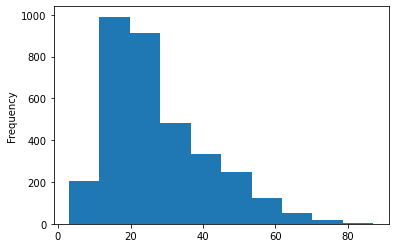

In [22]:
df_from_file.Age.plot(kind='hist')

In [23]:
#Now with female
df_from_file = df_from_file.rename(columns={'Sex ': 'Sex'})
df_from_file.Sex.unique()



array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [24]:
df_from_file.Sex.value_counts()
#Biggest group is Male, so I substitude misleading data with Male




M      5094
F       637
M         2
N         2
.         1
lli       1
Name: Sex, dtype: int64

In [25]:
df_from_file.Sex.replace(to_replace =['M ', 'lli', 'N', '.'], 
                         value = "M", inplace = True)

df_from_file.Sex.value_counts()


M    5100
F     637
Name: Sex, dtype: int64

In [26]:
#now lets deal with NAn data
sex_null = df_from_file.Sex.isnull().sum()
sex_notnull = df_from_file.Sex.notnull().sum()

print(f"There is {sex_null} null data vs {sex_notnull} not null data")

There is 19986 null data vs 5737 not null data


In [27]:
df_from_file.Sex.notnull()

0         True
1         True
2         True
3         True
4         True
         ...  
25718    False
25719    False
25720    False
25721    False
25722    False
Name: Sex, Length: 25723, dtype: bool

In [28]:
df_from_file.groupby('Sex').mean()

,Year,Age,original order,Age_Mean
Sex,,,,
F,1946.480377,26.918552,4012.087912,27.070855
M,1924.350726,27.536922,3092.621569,27.484744


M 0.89
F 0.11


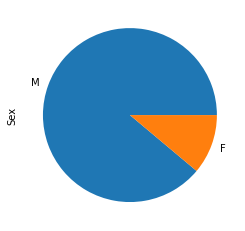

In [29]:
df_from_file.Sex.value_counts().plot(kind='pie')
#Proportion of Male vs Male is much bigger. so...lets say 
#Lets get a porcentage
null_data = 19986
M = 5100
F = 637
MF = M+F
r_M = round(M / MF, 2)
r_F = round(F / MF, 2)
print(f"M {r_M}")
print(f"F {r_F}")

# Conlusion: 89 Percent are male and 11 percent are famale
# I apply this percentages to NAN values in order to replace the values. 



In [30]:
#df_from_file[['Sex']].isnull().applymap(lambda x: ["M" for x in range(17788)])
df_from_file['Sex'].mode()
df_from_file.Sex.value_counts().mode()


0     637
1    5100
dtype: int64

<AxesSubplot:ylabel='Sex'>

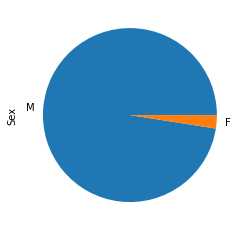

In [31]:
#df_from_file.groupby(['Country', "Sex"]).sum()
#df_from_file.groupby('Country').Age.transform(lambda x: x.fillna(x.mode()[0]))
#df_from_file['Sex']= df_from_file.Sex.transform(lambda x: x.fillna(x.mode()[0])
#replace using mode

df_from_file['Sex'].fillna(df_from_file['Sex'].mode()[0], inplace=True)

df_from_file.Sex.value_counts().plot(kind='pie')


In [32]:
df_from_file.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Age_Mean
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,57.000000
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,11.000000
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,48.000000
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,27.416074
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,27.416074


In [33]:
df_from_file[['Date', "Location"]]

,Date,Location
0,25-Jun-2018,"Oceanside, San Diego County"
1,18-Jun-2018,"St. Simon Island, Glynn County"
2,09-Jun-2018,"Habush, Oahu"
3,08-Jun-2018,Arrawarra Headland
4,04-Jun-2018,La Ticla
...,...,...
25718,NaN,NaN
25719,NaN,NaN
25720,NaN,NaN
25721,NaN,NaN


In [34]:
#df_from_file["Month"] =  df_from_file['Date'].str.split("-")
#df_from_file["Month"]


#df_from_file["Month"] = df_from_file["Month"].str.split(',')


In [35]:
df_from_file.Date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [36]:
df_from_file.Date.replace(to_replace =["1883-1889"], 
                         value = "1-Jun-1987", inplace = True)

In [37]:
df_from_file.Date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1-Jun-1987',
       '1845-1853', nan], dtype=object)

In [38]:
df_from_file.Date.replace(to_replace =["1845-1853"], 
                         value = "1-Jun-1850", inplace = True)

In [39]:
#es mentira hay mas
df_from_file.Date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1-Jun-1987',
       '1-Jun-1850', nan], dtype=object)

In [40]:
#Goin to make a copy of D and drop missing values in order to THINK!
D = df_from_file.Date.copy()

D.dropna(inplace = True)
D.value_counts()
D.replace(to_replace =["1845-1853"], 
                         value = "1-Jun-1850", inplace = True)
D

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6297    Before 1903
6298    Before 1903
6299      1900-1905
6300     1-Jun-1987
6301     1-Jun-1850
Name: Date, Length: 6302, dtype: object

In [41]:

D.value_counts()
#I dont have enought visibility so lets make a real list
d_list = list(D.unique())
d_list
#lets try to remove "Reported"
#trying Reegex and map
#list(map(re.sub("Reported", "", d_list),d_list))
#trying split
#d_list.split('Reported')
#lets try slplit
#dlist = pd.DataFrame([x.split('') for x in no_space_table.split('\n')])
d_list
#lets try regex
#text5 = re.sub("\?", "!", text)
D.value_counts()
#D.str.extract(r"(?P<day>.[0-9]*), (?P<month>.+), (?P<Year>.+)")
#lets try regex2
#d_list_2 = re.findall(r"[A-Z][a-z]+\s[A-Z][a-z]+\s\+", d_list)

#Regex does not work with list i guess
#Going to extract values
d_values = ' '.join([str(elem) for elem in d_list])
d_values
d_values_date = re.findall(r"[0-9]+\-", d_values)
d_values_date = ' '.join([str(elem) for elem in d_values_date])
d_values_date = re.findall(r"[0-9][0-9]", d_values_date)
d_values_date
#d_values_date = ' '.join([str(elem) for elem in d_values_date])
#d_values_date
#d_values_date = re.sub("\-", "", d_values_date)
#d_values_date 
d_values_date
d_values
d_values_month = re.findall(r"\-+\w+\-", d_values)
d_values_month
d_values_month = ' '.join([str(elem) for elem in d_values_month])
d_values_month = re.findall(r"\w+", d_values_month)
d_values_year= re.findall(r"[0-9][0-9][0-9][0-9]", d_values)
d_values_year


dmy = pd.DataFrame(list(zip(d_values_date,d_values_month, d_values_year)), 
                  columns=['Day',"Month","year"])

dmy




,Day,Month,year
0,25,Jun,2018
1,18,Jun,2018
2,09,Jun,2018
3,08,Jun,2018
4,04,Jun,2018
...,...,...,...
4794,18,Jul,1899
4795,80,Jul,1899
4796,19,Jul,1899
4797,51,Jun,1899


In [42]:
#Now lets create a colums like day-month-year!
#lets use numpy!!!!!!!!
#d_values_date = np.array(d_values_date)
#d_values_year = np.array(d_values_year)
#d_values_month = np.array(d_values_month)

#dmy_a = np.concatenate((d_values_date, d_values_month, d_values_year), axis=0)
#IT DID NOT WOOORRKK!!


In [43]:
#Now lets create a colums like day-month-year!
#lets try with REGGGEXXxx!

d_list

def listToString(d_list): 
    str1 = "" 
    for x in d_list: 
        str1 += f"{x} " 
    return str1

d_str = listToString(d_list)
d_str = re.findall(r"[0-9]+\-+\w+\-+[0-9][0-9][0-9][0-9]", d_str)
d_str

#OOHHH I SHOULD HAVE STARTED LIKE THIS I like it more now so lets do everything AGAIN!


['25-Jun-2018',
 '18-Jun-2018',
 '09-Jun-2018',
 '08-Jun-2018',
 '04-Jun-2018',
 '03-Jun-2018',
 '27-May-2018',
 '26-May-2018',
 '24-May-2018',
 '21-May-2018',
 '13-May-2018',
 '12-May-2018',
 '09-May-2018',
 '30-Apr-2018',
 '28-Apr-2018',
 '25-Apr-2018',
 '24-Apr-2018',
 '23-Apr-2018',
 '22-Apr-2018',
 '19-Apr-2018',
 '15-Apr-2018',
 '14-Apr-2018',
 '10-Apr-2018',
 '09-Apr-2018',
 '05-Apr-2018',
 '03-Apr-2018',
 '31-Mar-2018',
 '14-Mar-2018',
 '9-Mar-2018',
 '24-Feb-2018',
 '23-Feb-2018',
 '18-Feb-2018',
 '15-Feb-2018',
 '14-Feb-2018',
 '11-Feb-2018',
 '03-Feb-2018',
 '01-Feb-2018',
 '28-Jan-2018',
 '21-Jan-2018',
 '14-Jan-2018',
 '13-Jan-2018',
 '12-Jan-2018',
 '05-Jan-2018',
 '31-Dec-2017',
 '30-Dec-2017',
 '21-Dec-2017',
 '09-Dec-2017',
 '30-Nov-2017',
 '25-Nov-2017',
 '24-Nov-2017',
 '18-Nov-2017',
 '13-Nov-2017',
 '13-Nov-2017',
 '04-Nov-2017',
 '31-Oct-2017',
 '28-Oct-2017',
 '26-Oct-2017',
 '23-Oct-2017',
 '22-Oct-2017',
 '21-Oct-2017',
 '18-Oct-2017',
 '09-Oct-2017',
 '05-Oct-

In [44]:

#OOHHH I SHOULD HAVE STARTED LIKE THIS I like it more now so lets do everything AGAIN!
 

a = listToString(d_str)
d_values = d_values = re.findall(r"[0-9]+\-", a)
d_values_date = ' '.join([str(elem) for elem in d_values_date])
d_values_date = re.findall(r"[0-9][0-9]", d_values_date)
d_values_date

d_values_month = re.findall(r"\-+\w+\-", a)
d_values_month
d_values_month = ' '.join([str(elem) for elem in d_values_month])
d_values_month = re.findall(r"\w+", d_values_month)

#In realiaty this is mcuh better that what I have done before
d_values_month

d_values_year= re.findall(r"[0-9][0-9][0-9][0-9]", a)
d_values_year



dmy = pd.DataFrame(list(zip(d_values_date,d_values_month, d_values_year)), 
                  columns=['Day',"Month","year"])

In [45]:
#Now lets convert this to PD

df = pd.DataFrame(d_str,columns=['Date'])

df
dmy

#holly molly now the problem is they dont have the same amount of series WHYY=??=?=?=


,Day,Month,year
0,25,Jun,2018
1,18,Jun,2018
2,09,Jun,2018
3,08,Jun,2018
4,04,Jun,2018
...,...,...,...
4782,10,Jul,1916
4783,26,Jul,1913
4784,12,Jul,1913
4785,02,Jun,1987


In [46]:
#Well, lets concat...
df1 = pd.concat([df, dmy], axis= 0)
df1

#what a crappy execution...lets try join

,Date,Day,Month,year
0,25-Jun-2018,NaN,NaN,NaN
1,18-Jun-2018,NaN,NaN,NaN
2,09-Jun-2018,NaN,NaN,NaN
3,08-Jun-2018,NaN,NaN,NaN
4,04-Jun-2018,NaN,NaN,NaN
...,...,...,...,...
4782,NaN,10,Jul,1916
4783,NaN,26,Jul,1913
4784,NaN,12,Jul,1913
4785,NaN,02,Jun,1987


In [47]:
df2 = df.join([dmy])
df2
#what a crappy execution part 2...lets try something else A bit LOST HERE

,Date,Day,Month,year
0,25-Jun-2018,25,Jun,2018
1,18-Jun-2018,18,Jun,2018
2,09-Jun-2018,09,Jun,2018
3,08-Jun-2018,08,Jun,2018
4,04-Jun-2018,04,Jun,2018
...,...,...,...,...
4782,17-Jul-1916,10,Jul,1916
4783,19-Jul-1913,26,Jul,1913
4784,19-Jul-1913,12,Jul,1913
4785,1-Jun-1987,02,Jun,1987


In [48]:
dmy

,Day,Month,year
0,25,Jun,2018
1,18,Jun,2018
2,09,Jun,2018
3,08,Jun,2018
4,04,Jun,2018
...,...,...,...
4782,10,Jul,1916
4783,26,Jul,1913
4784,12,Jul,1913
4785,02,Jun,1987


In [49]:
dmy[["year"]].value_counts()
dmy[["Month"]].value_counts()
dmy[["Day"]].value_counts()
#Aparently this data is not that good...

Day
26     183
15     178
14     170
10     169
11     167
25     167
12     166
24     165
27     164
13     163
04     163
21     162
02     161
09     160
19     160
22     156
28     154
05     154
01     153
16     152
06     151
03     148
08     147
07     143
29     143
18     142
20     140
23     140
30     137
17     133
31      91
60       1
49       1
52       1
58       1
98       1
dtype: int64

In [50]:
# lets try with this, lets say we wanto to join this with the original data set??

df

,Date
0,25-Jun-2018
1,18-Jun-2018
2,09-Jun-2018
3,08-Jun-2018
4,04-Jun-2018
...,...
4782,17-Jul-1916
4783,19-Jul-1913
4784,19-Jul-1913
4785,1-Jun-1987


In [51]:
#I think this soud be an INNER Join
df_from_file2 = pd.merge(df_from_file, df, on="Date")
df_from_file2[["Date"]]

#and now i think is working?

,Date
0,25-Jun-2018
1,18-Jun-2018
2,09-Jun-2018
3,08-Jun-2018
4,04-Jun-2018
...,...
4829,27-Jul-1751
4830,17-Dec-1742
4831,26-Mar-1703
4832,1-Jun-1987


In [52]:
df_from_file2[['Date', "Location"]]

,Date,Location
0,25-Jun-2018,"Oceanside, San Diego County"
1,18-Jun-2018,"St. Simon Island, Glynn County"
2,09-Jun-2018,"Habush, Oahu"
3,08-Jun-2018,Arrawarra Headland
4,04-Jun-2018,La Ticla
...,...,...
4829,27-Jul-1751,NaN
4830,17-Dec-1742,Carlisle Bay
4831,26-Mar-1703,Carlisle Bay
4832,1-Jun-1987,"Panama Bay 8ºN, 79ºW"


In [53]:
#df_from_file2.groupby("Date", "Location").groups
#Cant group like this
#lets explore the data agian..
df_from_file2.notnull().sum()

Case Number               4834
Date                      4834
Year                      4834
Type                      4832
Country                   4817
Area                      4628
Location                  4606
Activity                  4537
Name                      4713
Sex                       4834
Age                       3103
Injury                    4819
Fatal (Y/N)               4437
Time                      2812
Species                   2890
Investigator or Source    4823
pdf                       4834
href formula              4833
href                      4834
Case Number.1             4834
Case Number.2             4834
original order            4834
Unnamed: 22                  1
Unnamed: 23                  1
Age_Mean                  4834
dtype: int64

In [54]:
#just realized there is column called YEAR HAHAHA I can use to fill out date...HoW??
df_from_file2.groupby(["Date", "Year"]).groups

df_from_file2.Date.fillna(df_from_file2["Year"], inplace=True)
#df_from_file['Sex'].fillna(df_from_file['Sex'].mode()[0], inplace=True)
df_from_file2.isnull().sum()
#Now I have date completed

Case Number                  0
Date                         0
Year                         0
Type                         2
Country                     17
Area                       206
Location                   228
Activity                   297
Name                       121
Sex                          0
Age                       1731
Injury                      15
Fatal (Y/N)                397
Time                      2022
Species                   1944
Investigator or Source      11
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               4833
Unnamed: 23               4833
Age_Mean                     0
dtype: int64

In [55]:
#NOW LETS DEAL WITH LOCATION muaahha

df_from_file2.groupby(["Location", "Country"]).agg(np.sum)
#ok I cant do anything with this
#I think I shoould fill NAN with the most frequent value for each country location"Mode" between country and location 

,,Year,Age,original order,Age_Mean
Location,Country,,,,
A pearl farm in Roebuck Bay,AUSTRALIA,1993.0,27.0,3840.0,27.000000
"Ambatolaoka, Nosy Be Island",MADAGASCAR,2010.0,59.0,5274.0,59.000000
Bellingen,AUSTRALIA,1966.0,0.0,2725.0,27.416074
"Black Head, south of Taree",AUSTRALIA,1923.0,0.0,1105.0,27.416074
"Boa Viagem Beach, Recife",BRAZIL,1998.0,22.0,4148.0,22.000000
...,...,...,...,...,...
off Culebra,PANAMA,1935.0,14.0,1401.0,14.000000
off Dakar,SENEGAL,1960.0,0.0,2336.0,27.416074
"off Paoay, Ilocos Norte Province",PHILIPPINES,2008.0,39.0,5110.0,39.000000


In [58]:

df_from_file2.merge(m,on='Country')

m.Country.unique()
df_from_file2.Country.unique()
#df_from_file.Sex.value_counts().mode() #Recordatorio



df_from_file2["Country"] = df_from_file2["Country"].str.replace(r' ', '')
df_from_file2.Country.unique()
df_from_file2.Country.unique()
df_from_file2.isnull().sum()



Case Number                  0
Date                         0
Year                         0
Type                         2
Country                     17
Area                       206
Location                   228
Activity                   297
Name                       121
Sex                          0
Age                       1731
Injury                      15
Fatal (Y/N)                397
Time                      2022
Species                   1944
Investigator or Source      11
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               4833
Unnamed: 23               4833
Age_Mean                     0
dtype: int64

In [57]:
#Me saco la moda de cada país con este codigo que me he encontrado en internete

m=(df_from_file2.groupby('Country')['Location'].apply(lambda x: x.mode(dropna=False).iat[0])
.reset_index(name='Location'))

m
#Con esto me hago un inner join

/Users/alejandrocampos/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:897: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  warn(f"Unable to sort modes: {err}")
/Users/alejandrocampos/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:897: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  warn(f"Unable to sort modes: {err}")


,Country,Location
0,PHILIPPINES,NaN
1,TONGA,30 nautical miles offshore
2,ADMIRALTY ISLANDS,Sisi (west coast of island)
3,AMERICAN SAMOA,Near tuna cannery in Pago Pago Harbor
4,ANDAMAN / NICOBAR ISLANDAS,NaN
...,...,...
151,VENEZUELA,NaN
152,VIETNAM,Quy Nhon
153,WESTERN SAMOA,Nu’ulua
154,YEMEN,Ras-Alkalb


In [ ]:
#df_from_file2 = pd.merge(df_from_file2, m, on="Location")
#df_from_file2.isnull().sum()
#No me sale esto de arriba del join

In [68]:
df_from_file2.Location.fillna(df_from_file2.Location.mode(), inplace=True)
df_from_file2
df_from_file2.isnull().sum()
#pues nope


Case Number                  0
Date                         0
Year                         0
Type                         2
Country                     17
Area                       206
Location                   228
Activity                   297
Name                       121
Sex                          0
Age                       1731
Injury                      15
Fatal (Y/N)                397
Time                      2022
Species                   1944
Investigator or Source      11
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               4833
Unnamed: 23               4833
Age_Mean                     0
dtype: int64